## Imports

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Load Data

In [8]:
# Define the path to the CSV file
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data_v2.csv')

# Load the dataset
df = pd.read_csv(data_path)

In [13]:
# mendefinisi kolom yang memprediksi (xcol) dan diprediksi (ycol) 
# pokoknya yang di hashtagin itu gaperlu, karena yang ada malah nurunin si MAE nya
ycol = df['average_daily_rate']  # Replace 'target' with the actual name of your target column
xcol = ['stay_duration_in_days', 'booking_window', 'distance_to_coastline', 'lat','review_sentiment_score', 'lng', 'rating']

# Normalize the dataset
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
xcol_normalized = scaler.fit_transform(df[xcol])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xcol_normalized, ycol, test_size=0.2, random_state=42)

## RandomForestRegressor tanpa GWO

In [14]:
# inisialisasi RandomForestRegressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=30, n_jobs=-1, bootstrap=False)
rf_regressor = RandomForestRegressor(
    n_estimators=110,
    random_state=42,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=2,
    bootstrap=False,
    n_jobs=-1
)

# train model
rf_regressor.fit(x_train, y_train)

# prediksi di test set
y_pred_train = rf_regressor.predict(x_train)
y_pred_test = rf_regressor.predict(x_test)

Training MAE: 9613.884286405568
Test MAE: 14740.925422718381


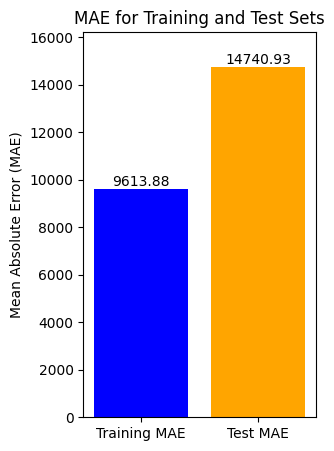

In [15]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model using MAE
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# visualisasi MAE
labels = ['Training MAE', 'Test MAE']
values = [train_mae, test_mae]

plt.figure(figsize=(3, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Test Sets')
plt.ylim(0, max(values) * 1.1)  
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')  
plt.show()

## Tampilkan variabel-variabel penting

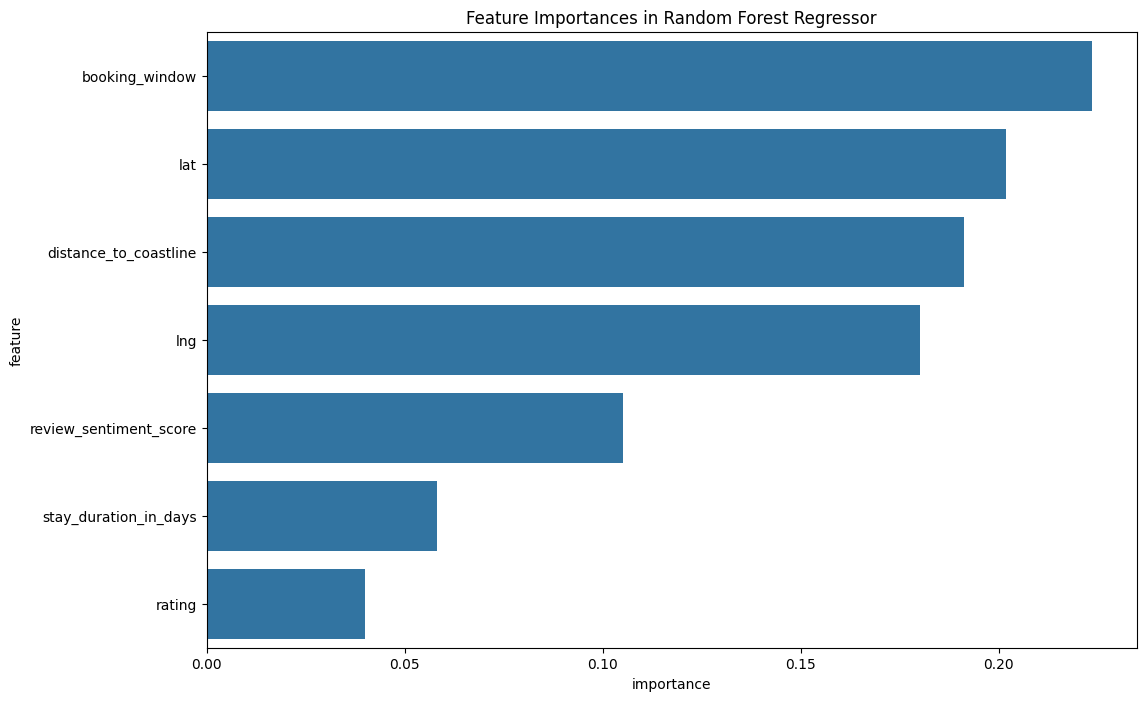

In [17]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'feature': xcol,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances in Random Forest Regressor')
plt.show()